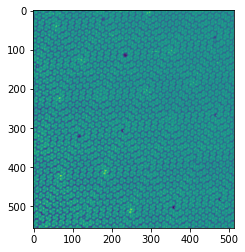

In [2]:
import matplotlib.pyplot as plt
import numpy as np

im = np.loadtxt('17056.txt')
plt.imshow(im)

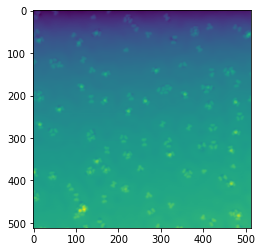

In [3]:
import pickle
d = pickle.load(open('111_test_data.p','rb'))
im = d['image']
rescale = d['rescale']
plt.imshow(im)


In [ ]:
pip install nanonispy

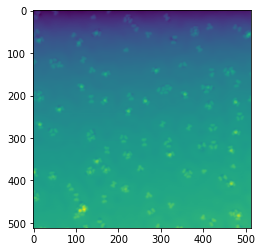

In [4]:
import nanonispy as nap

scan = nap.read.Scan("Ag111_APT_111.sxm")

im = scan.signals['Z']['forward']
if scan.header['scan_dir'] == 'down':
    im = np.flipud(im)
    
## add mean values of image if scan is incomplete
im[np.isnan(im)] = np.mean(im[~np.isnan(im)])

## factor for converting between pixels/ realspace
rescale = scan.header['scan_range']/scan.header['scan_pixels']
plt.imshow(im)

In [ ]:
pip install opencv-python

In [5]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


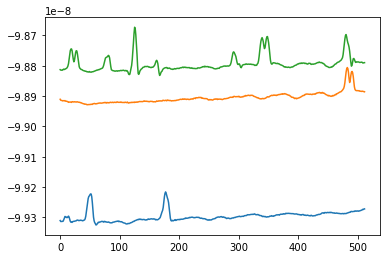

In [6]:
plt.plot(im[:][0])
plt.plot(im[:][256])
plt.plot(im[:][-1])

In [7]:
import cv2

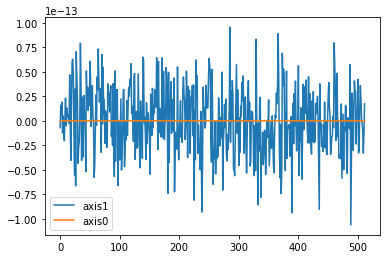

In [8]:
imslice = im
ind1 = np.arange(imslice.shape[0])
ind2 = np.arange(imslice.shape[1])
xm = np.mean(imslice,axis=0)
for ix in ind1:
    imslice[ix,:] = imslice[ix,:]-xm
ym = np.mean(imslice,axis=1)
for iy in ind2:
    imslice[:,iy] = imslice[:,iy]-ym
    
ym = np.mean(imslice,axis=1)
xm = np.mean(imslice,axis=0)
plt.plot(ind2,xm,label='axis1')
plt.plot(ind1,ym,label='axis0')
plt.legend()

In [9]:
from skimage import segmentation
from skimage import filters

mask = imslice > filters.threshold_otsu(imslice)
clean_border = segmentation.clear_border(mask)
imslice_edges = segmentation.mark_boundaries(imslice, clean_border.astype(int))

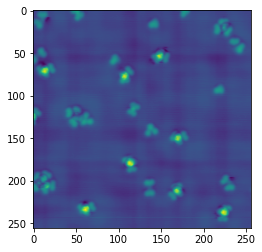

In [10]:
plt.imshow(imslice[0:256,0:256])

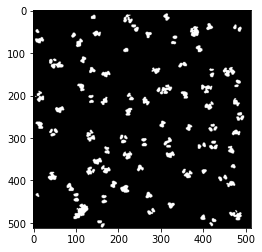

In [11]:
bi=plt.imshow(clean_border[0:512,0:512], cmap='gray')

In [12]:
from skimage import measure

blobs_labels = measure.label(clean_border, background=0)

In [13]:
np.unique(blobs_labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108])

In [22]:
import pandas as pd
props = measure.regionprops_table(label_image, properties=('area', 'perimeter','major_axis_length','minor_axis_length','solidity','euler_number','eccentricity'))
improps = pd.DataFrame(props)
improps

,area,perimeter,major_axis_length,minor_axis_length,solidity,euler_number,eccentricity
0,152,48.870058,17.513965,11.992003,0.868571,1,0.728815
1,268,82.976659,22.490768,19.383384,0.750700,1,0.507185
2,90,33.313708,12.229129,9.615471,0.978261,1,0.617875
3,163,50.870058,16.069231,14.403910,0.885870,1,0.443315
4,170,60.041631,22.085665,11.471102,0.829268,1,0.854537
...,...,...,...,...,...,...,...
82,167,58.284271,20.807370,11.741632,0.822660,1,0.825569
83,364,112.633514,31.582277,18.805317,0.728000,0,0.803401
84,113,38.970563,13.170378,11.375837,0.933884,1,0.503931
85,77,31.313708,11.676176,8.609295,0.939024,1,0.675523


In [40]:
result = pd.concat([df1, improps], axis=1)

result.rename(columns = {0:'cluster'},inplace=True)
cluster0

,cluster,area,perimeter,major_axis_length,minor_axis_length,solidity,euler_number,eccentricity
2,0,90,33.313708,12.229129,9.615471,0.978261,1,0.617875
5,0,67,28.727922,11.622928,7.449570,0.971014,1,0.767593
7,0,80,31.556349,12.402723,8.277075,0.963855,1,0.744736
8,0,60,26.727922,10.367672,7.470850,0.967742,1,0.693361
11,0,91,33.798990,12.887856,9.125988,0.957895,1,0.706105
12,0,72,29.313708,11.206977,8.143350,0.947368,1,0.687027
15,0,73,31.313708,12.454522,7.546336,0.912500,1,0.795532
17,0,97,34.142136,12.626297,9.828724,0.970000,1,0.627728
24,0,48,25.313708,11.117961,5.590354,0.923077,1,0.864390
26,0,83,32.970563,11.852250,9.104018,0.932584,1,0.640299


In [32]:

cluster0=result[result["cluster"] == 0]
p_arr=cluster0[['perimeter']].values.tolist()
p_arr


[[33.31370849898476],
 [28.72792206135785],
 [31.556349186104043],
 [26.727922061357855],
 [33.798989873223334],
 [29.31370849898476],
 [31.31370849898476],
 [34.14213562373095],
 [25.31370849898476],
 [32.97056274847714],
 [30.727922061357855],
 [29.31370849898476],
 [32.14213562373095],
 [29.899494936611667],
 [28.727922061357855],
 [32.14213562373095],
 [30.899494936611664],
 [32.97056274847714],
 [34.97056274847714],
 [31.556349186104047],
 [31.556349186104047],
 [31.899494936611667],
 [30.727922061357855],
 [33.55634918610404],
 [33.55634918610404],
 [38.970562748477136],
 [31.31370849898476],
 [26.97056274847714]]

In [48]:
cluster2=result[result["cluster"] == 2]
p_arr2=cluster2[['perimeter']].values.tolist()
p_arr2

[[136.1543289325507],
 [103.49747468305833],
 [129.49747468305833],
 [99.84062043356595],
 [109.84062043356595],
 [87.11269837220809],
 [90.42640687119285],
 [129.74011537017762],
 [112.6335136523794]]

C:\Users\sshlywjx\anaconda3\lib\site-packages\skimage\color\colorlabel.py:113: UserWarning: Negative intensities in `image` are not supported
  return _label2rgb_overlay(label, image, colors, alpha, bg_label,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


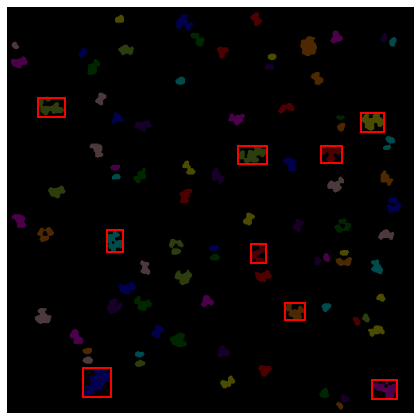

In [57]:
thresh = threshold_otsu(imslice)
bw = closing(imslice > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=imslice, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if [region.perimeter]  in p_arr2:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

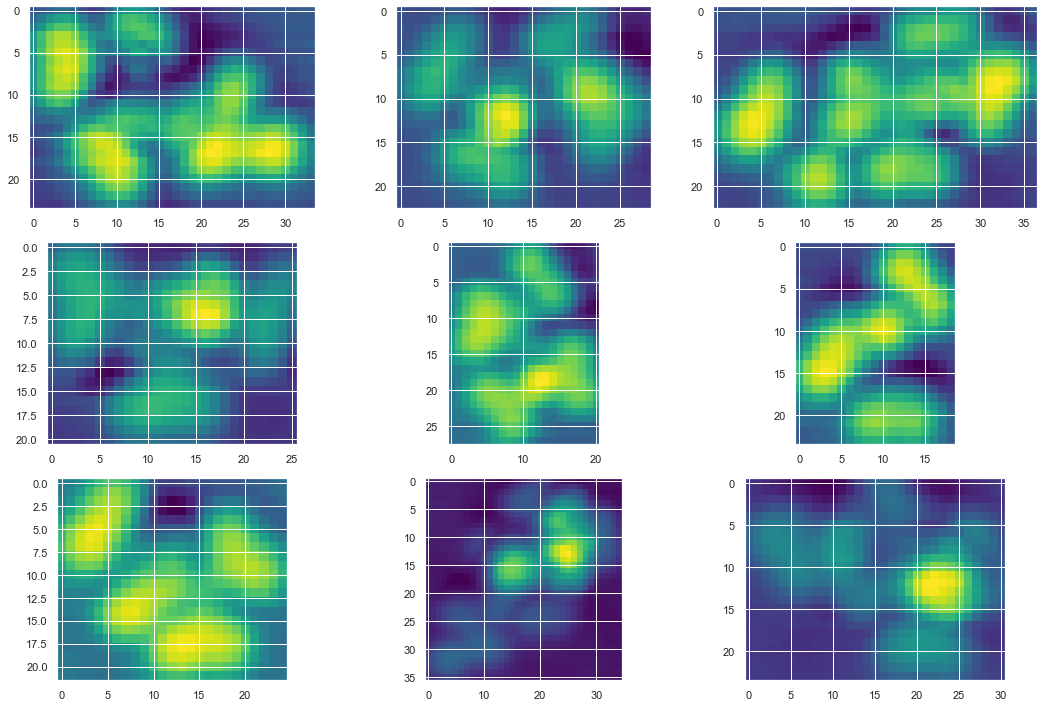

In [59]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

j = 0
for region in regionprops(label_image):
    # take regions with large enough areas
    if [region.perimeter] in p_arr2 and j < 100:
        i = j//3 # integer division, rounded down to nearest integer
        k = j%3 # calculate remainder of k//2

        minr, minc, maxr, maxc = region.bbox
        ax[i,k].imshow(imslice[minr:maxr,minc:maxc],cmap='viridis')
        j = j+1

fig.tight_layout()


In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
XX = improps
X = (XX-XX.mean())/XX.std()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X1 = pd.DataFrame(X_pca)

kmeans = KMeans(n_clusters=4)
clf=kmeans.fit(X1)
y_kmeans1 = kmeans.predict(X1)
xx1, yy1 = np.meshgrid(np.linspace(-3,7), np.linspace(-2,3))


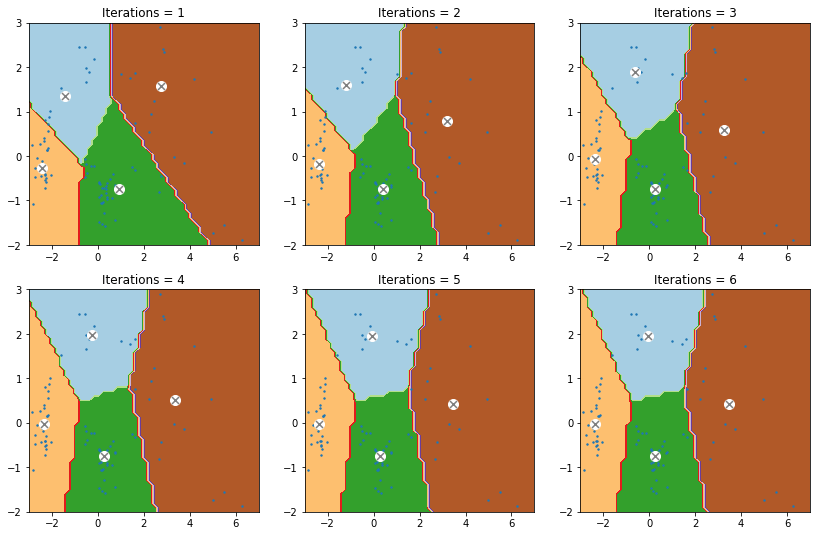

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(14,9)) 
for niter, axi in zip(range(1,7), ax.flat):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1, max_iter=niter, random_state=0)
    clf=kmeans.fit(X1) 
    
    y_kmeans = kmeans.predict(X1) 
    
    plt_decision_boundaries(clf,xx1,yy1,ax=axi) 
    axi.scatter(X1[0], X1[1], s=2, cmap='viridis') 
    centers = kmeans.cluster_centers_ 
    axi.scatter(centers[:,0], centers[:,1], c='white', s=100, alpha=1.)
    axi.scatter(centers[:,0], centers[:,1], c='black', marker='x', s=50, alpha=0.5)
    axi.set_title('Iterations = {0}'.format(niter))

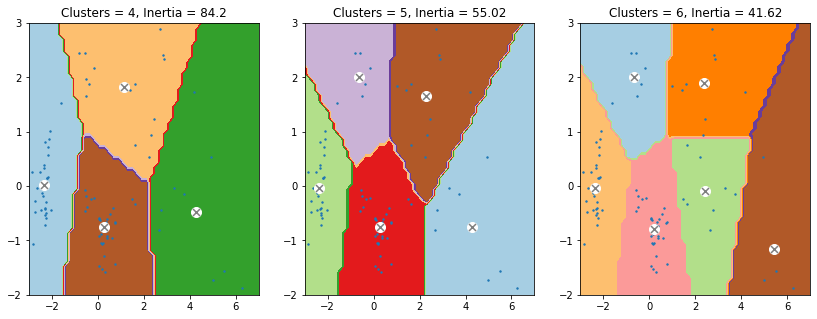

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
for ncl, axi in zip(range(4,7), ax.flat):
    kmeans = KMeans(n_clusters=ncl)
    clf=kmeans.fit(X1) 
    y_kmeans = kmeans.predict(X1) 
    plt_decision_boundaries(clf,xx1,yy1,ax=axi)
    axi.scatter(X1[0], X1[1], s=2, cmap='viridis') 
    centers = kmeans.cluster_centers_  
    axi.scatter(centers[:,0], centers[:,1], c='white', s=100, alpha=1.)
    axi.scatter(centers[:,0], centers[:,1], c='black', marker='x', s=50, alpha=0.5)
    
    axi.set_title('Clusters = {0}, Inertia = {1}'.format(ncl,np.round(kmeans.inertia_,2)))

C:\Users\sshlywjx\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


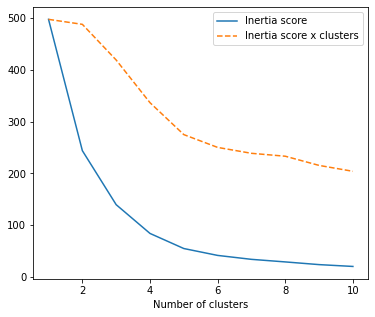

In [28]:
nclusters = np.arange(1,11) 
inertia_score = [] 
for ncl in nclusters: 
    kmeans = KMeans(n_clusters=ncl)
    kmeans.fit(X1) 
    inertia_score.append(kmeans.inertia_) 

fig = plt.figure(figsize=(6,5)) 
plt.plot(nclusters,inertia_score,'-',label='Inertia score')
plt.plot(nclusters,nclusters*inertia_score,'--',label='Inertia score x clusters')
plt.legend() 
plt.xlabel('Number of clusters'); 

In [29]:
df1 = pd.DataFrame(y_kmeans1)


Text(0, 0.5, 'number of molecules')

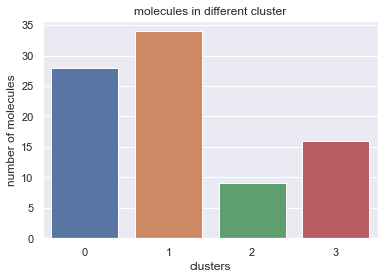

In [30]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x=df1[0], data=df1)
plt.title('molecules in different cluster')
plt.xlabel('clusters')
plt.ylabel('number of molecules')

In [61]:
XX = improps
X = (XX-XX.mean())/XX.std()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X1 = pd.DataFrame(X_pca)

kmeans = KMeans(n_clusters=5)
clf5=kmeans.fit(X1)
y_kmeans5 = kmeans.predict(X1)
xx1, yy1 = np.meshgrid(np.linspace(-3,7), np.linspace(-2,3))
df2 = pd.DataFrame(y_kmeans5)

In [14]:
from logitplots import plt_confusion_matrix, plt_decision_boundaries

Text(0, 0.5, 'number of molecules')

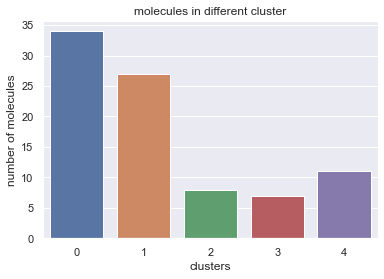

In [66]:
result2 = pd.concat([df2, improps], axis=1)

result2.rename(columns = {0:'cluster'},inplace=True)
sns.set(style="darkgrid")
ax = sns.countplot(x=df2[0], data=df2)
plt.title('molecules in different cluster')
plt.xlabel('clusters')
plt.ylabel('number of molecules')

In [77]:
cluster20=result2[result2["cluster"] == 0]
p_arr20=cluster20[['perimeter']].values.tolist()
p_arr20

[[48.87005768508881],
 [60.04163056034261],
 [57.11269837220809],
 [61.45584412271572],
 [58.62741699796952],
 [52.04163056034262],
 [46.62741699796952],
 [56.284271247461895],
 [61.698484809834994],
 [59.698484809834994],
 [59.62741699796952],
 [59.21320343559643],
 [57.798989873223334],
 [58.2842712474619],
 [59.21320343559643],
 [60.2842712474619],
 [57.21320343559643],
 [72.76955262170047],
 [61.698484809834994],
 [59.4558441227157],
 [48.62741699796952],
 [60.04163056034261],
 [48.62741699796952],
 [57.45584412271571],
 [56.284271247461895],
 [58.04163056034262],
 [55.4558441227157],
 [62.87005768508881],
 [63.698484809834994],
 [73.698484809835],
 [52.62741699796952],
 [59.45584412271571],
 [60.62741699796952],
 [58.284271247461895]]

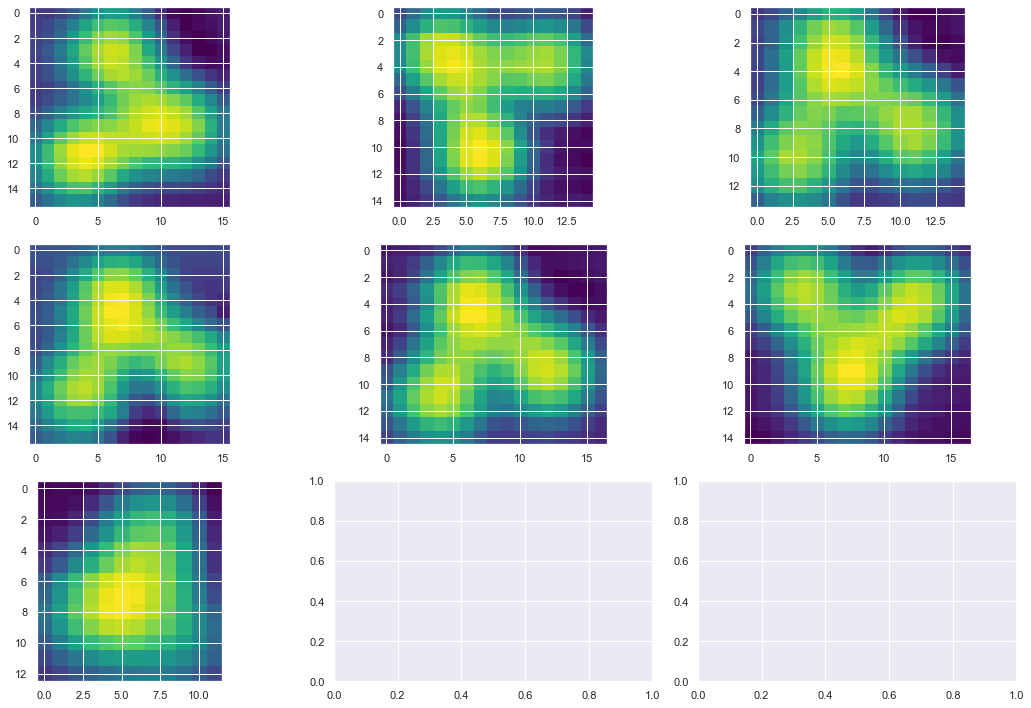

In [84]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

j = 0
for region in regionprops(label_image):
    # take regions with large enough areas
    if [region.perimeter] in p_arr23 and j < 100:
        i = j//3 # integer division, rounded down to nearest integer
        k = j%3 # calculate remainder of k//2

        minr, minc, maxr, maxc = region.bbox
        ax[i,k].imshow(imslice[minr:maxr,minc:maxc],cmap='viridis')
        j = j+1

fig.tight_layout()

C:\Users\sshlywjx\anaconda3\lib\site-packages\skimage\color\colorlabel.py:113: UserWarning: Negative intensities in `image` are not supported
  return _label2rgb_overlay(label, image, colors, alpha, bg_label,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


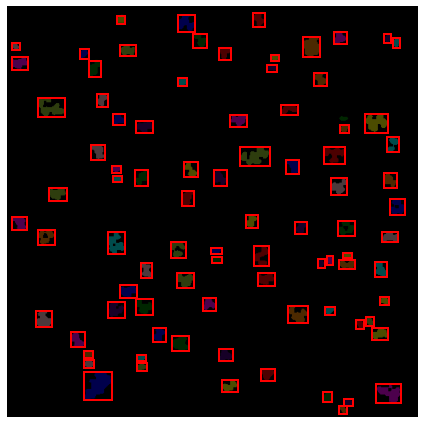

In [21]:
# apply threshold
thresh = threshold_otsu(imslice)
bw = closing(imslice > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=imslice, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 50:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [15]:
from skimage.feature import blob_dog, blob_log, blob_doh

In [16]:
from math import sqrt

In [17]:
from skimage.morphology import (erosion, dilation, closing, opening,area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table

In [18]:
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

In [19]:
from skimage.color import rgb2gray, rgb2hsv

In [20]:
import skimage.io
import skimage.color
import skimage.filters